# Browse the data

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as ticker

import os
import sys
import warnings

import numpy as np
import pandas as pd
#from mizani.formatters import percent_format
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
pip install plotnine --user

  Using cached plotnine-0.12.4-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached statsmodels-0.14.1-cp38-cp38-win_amd64.whl (10.0 MB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
  Using cached mizani-0.9.3-py3-none-any.whl (73 kB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

statsmodels 0.14.1 requires packaging>=21.3, but you'll have packaging 20.4 which is incompatible.
statsmodels 0.14.1 requires patsy>=0.5.4, but you'll have patsy 0.5.1 which is incompatible.
pandas 2.0.3 requires python-dateutil>=2.8.2, but you'll have python-dateutil 2.8.1 which is incompatible.
formulaic 0.6.1 requires scipy>=1.6, but you'll have scipy 1.5.2 which is incompatible.
formulaic 0.6.1 requires typing-extensions>=4.2.0, but you'll have typing-extensions 3.7.4.3 which is incompatible.


In [ ]:
from plotnine import ggplot, aes, geom_line

In [5]:
df= pd.read_csv('C:/Pythin/airbnb/listings (2).csv') #import the dataset

df.replace("NaN", np.nan, inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,84.0,4,76,2024-08-20,0.62,1,252,15,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama (3 people),107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,96.0,2,213,2024-09-13,1.68,1,270,19,56539/AL.
2,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.711560,-9.129870,Entire home/apt,78.0,2,401,2024-09-06,2.67,1,295,22,28737/AL
3,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.711080,-9.159790,Entire home/apt,1032.0,2,133,2024-09-01,0.80,1,263,24,55695/AL
4,29915,Modern and Spacious Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.745710,-9.152640,Entire home/apt,100.0,6,61,2024-05-20,0.35,1,92,5,85851/AL.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24199,1243403799584587485,Urban Tram @ Lively Bica,76223539,BnBird,Lisboa,Misericrdia,38.710366,-9.146229,Entire home/apt,60.0,3,0,NaN,NaN,161,338,0,71075/AL
24200,1243421531996967673,New! Lisbon Designer's Hideaway Studio - Central!,1320531,Rachel,Lisboa,So Vicente,38.718720,-9.129847,Entire home/apt,104.0,1,0,NaN,NaN,3,352,0,Exempt
24201,1243488183394801906,Apartamento luxo,559577767,Magda,Vila Franca De Xira,Pvoa de Santa Iria e Forte da Casa,38.858709,-9.063884,Entire home/apt,136.0,1,0,NaN,NaN,1,365,0,2525
24202,1243509538559076353,Beach Studio 2- Hidden Gem,458564790,Hidden Gem,Cascais,Cascais e Estoril,38.701190,-9.386440,Entire home/apt,174.0,1,0,NaN,NaN,5,130,0,144248/AL


## Types and Cleaning the dataset

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24204 entries, 0 to 24203
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24204 non-null  int64  
 1   name                            24204 non-null  object 
 2   host_id                         24204 non-null  int64  
 3   host_name                       24204 non-null  object 
 4   neighbourhood_group             24204 non-null  object 
 5   neighbourhood                   24204 non-null  object 
 6   latitude                        24204 non-null  float64
 7   longitude                       24204 non-null  float64
 8   room_type                       24204 non-null  object 
 9   price                           21233 non-null  float64
 10  minimum_nights                  24204 non-null  int64  
 11  number_of_reviews               24204 non-null  int64  
 12  last_review                     

In fact there is nothing much to change because all the variables imported in the correct type apart from last_review which should be as datetime.

In [8]:
df['last_review']=pd.to_datetime(df['last_review'])

In [9]:
df = df.dropna()
df = df.drop_duplicates()

In [10]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,25659,Heart of Alfama - Le cœur d'Alfama (3 people),107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,96.0,2,213,2024-09-13,1.68,1,270,19,56539/AL.
2,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.711560,-9.129870,Entire home/apt,78.0,2,401,2024-09-06,2.67,1,295,22,28737/AL
3,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.711080,-9.159790,Entire home/apt,1032.0,2,133,2024-09-01,0.80,1,263,24,55695/AL
4,29915,Modern and Spacious Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.745710,-9.152640,Entire home/apt,100.0,6,61,2024-05-20,0.35,1,92,5,85851/AL.
6,42519,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,136230,David,Lisboa,Misericrdia,38.710620,-9.149000,Entire home/apt,90.0,1,199,2024-07-16,1.26,7,286,23,81551/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24074,1236697948245027193,GuestReady - Graceful Retreat in Lisbon,599106937,Rute,Lisboa,Estrela,38.704831,-9.172818,Entire home/apt,120.0,1,2,2024-09-11,2.00,1,333,2,Exempt
24084,1237122953971037968,Beautiful house,596733178,Edite,Cascais,So Domingos de Rana,38.721123,-9.344916,Private room,30.0,1,2,2024-09-12,2.00,1,328,2,Exempt
24104,1239118634367538046,Collares-Sintra Petit Palais CC,290159529,West Coast Design&Surf Villas,Sintra,Colares,38.799233,-9.448724,Entire home/apt,146.0,2,1,2024-09-09,1.00,13,357,1,140869/AL
24128,1239999103133917791,Quarto Lisboa,650620653,Eliane,Lisboa,Santa Clara,38.791235,-9.153980,Private room,32.0,2,1,2024-09-13,1.00,1,360,1,Exempt


## Task 3

In [11]:
columns_to_keep = ['id', 'price', 'property_type', 'room_type', 'cancellation_policy', 
                   'bed_type', 'neighbourhood_cleansed', 'longitude','latitude', 'neighbourhood']

relevant_columns = [col for col in columns_to_keep if col in df.columns]
df = df[relevant_columns]

In [12]:
df

,id,price,room_type,longitude,latitude,neighbourhood
1,25659,96.0,Entire home/apt,-9.127060,38.712410,Santa Maria Maior
2,29396,78.0,Entire home/apt,-9.129870,38.711560,Santa Maria Maior
3,29720,1032.0,Entire home/apt,-9.159790,38.711080,Estrela
4,29915,100.0,Entire home/apt,-9.152640,38.745710,Avenidas Novas
6,42519,90.0,Entire home/apt,-9.149000,38.710620,Misericrdia
...,...,...,...,...,...,...
24074,1236697948245027193,120.0,Entire home/apt,-9.172818,38.704831,Estrela
24084,1237122953971037968,30.0,Private room,-9.344916,38.721123,So Domingos de Rana
24104,1239118634367538046,146.0,Entire home/apt,-9.448724,38.799233,Colares
24128,1239999103133917791,32.0,Private room,-9.153980,38.791235,Santa Clara


In [13]:
set(df['room_type'])

{'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'}

In [14]:
df.describe()

,id,price,longitude,latitude
count,1.792400e+04,17924.000000,17924.000000,17924.000000
mean,4.085441e+17,148.867050,-9.207986,38.760123
std,4.767241e+17,291.646032,0.113061,0.110757
min,2.565900e+04,11.000000,-9.487190,38.676140
25%,2.400994e+07,78.000000,-9.290052,38.710680
50%,4.964488e+07,111.000000,-9.147405,38.717445
75%,9.042071e+17,165.000000,-9.134740,38.744700
max,1.242064e+18,20000.000000,-8.812240,39.304029


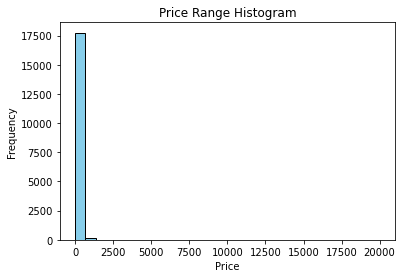

In [15]:
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Range Histogram')
 
# Display the plot
plt.show()

## Let's get rid of outliers in the column price

# Filtering data for only Lisbon 

Since the dataset contains not only Lisbon neighbourhoods but also some other parts of the country (the region itself is big). We will filter for only city's neighbourhoods to not get estimation bias

In [69]:
Lisbon_neighborhoods = [
    "Alfama", "Baixa", "Bairro Alto", "Chiado", "Avenida da Liberdade", 
    "Graa", "Mouraria", "Cais do Sodr", "Príncipe Real", "Santa Catarina",
    "Campo de Ourique", "Belm", "Alcntara", "Santos", "Ajuda", 
    "Restelo", "Parque das Naes", "Areeiro", "Olivais", "Telheiras", 
    "Lumiar", "Alvalade", "Amoreiras", "Benfica", "Carnide", 
    "Marvila", "So Domingos de Benfica", "Misericrdia", "Santa Maria Maior"
] 

Lisbon_neighborhoods1 = [
    "Alfama", "Bairro Alto", "Belm", "Chiado", "Avenidas Novas", "Parque das Naes", 
    "Alcntara", "Estrela", "Graa", 'Campo de Ourique', "Lapa", "Oeiras", "Baixa" 
] 

Lisbon_neighborhoods2 = [
    "Belm", "Ajuda", "Alcntara", 'Campo de Ourique', "Estrela",'Misericrdia',
    'Santo Antnio', 'Santa Maria Maior', 'Arroios', 'Penha de Frana', 
    "Beato", "Marvila", "Olivais", 'Parque das Naes', "Chiado", "Alfama",
    'Benfica', 'Campolide', 'Avenidas Novas', "Areeiro", 'Alvalade',
    'So Domingos de Benfica', 'Carnide', "Lumair", 'Santa Clara', "Bairro Alto"]


In [70]:
set(df['neighbourhood'])

{'A dos Cunhados e Maceira',
 'Abrigada e Cabanas de Torres',
 'Agualva e Mira-Sintra',
 'Ajuda',
 'Alcabideche',
 'Alcntara',
 'Aldeia Galega da Merceana e Aldeia Gavinha',
 'Alenquer (Santo Estvo e Triana)',
 'Alfragide',
 'Algs, Linda-a-Velha e Cruz Quebrada-Dafundo',
 'Algueiro-Mem Martins',
 'Alhandra, So Joo dos Montes e Calhandriz',
 'Almargem do Bispo, Pro Pinheiro e Montelavar',
 'Alvalade',
 'Alverca do Ribatejo e Sobralinho',
 'Areeiro',
 'Arranh',
 'Arroios',
 'Arruda dos Vinhos',
 'Aveiras de Baixo',
 'Avenidas Novas',
 'Azambuja',
 'Azueira e Sobral da Abelheira',
 'Barcarena',
 'Beato',
 'Belm',
 'Benfica',
 'Bucelas',
 'Cacm e So Marcos',
 'Cadaval e Pro Moniz',
 'Camarate, Unhos e Apelao',
 'Campelos e Outeiro da Cabea',
 'Campo de Ourique',
 'Campolide',
 'Carcavelos e Parede',
 'Cardosas',
 'Carnaxide e Queijas',
 'Carnide',
 'Carregado e Cadafais',
 'Carvoeira',
 'Carvoeira e Carmes',
 'Casal de Cambra',
 'Cascais e Estoril',
 'Colares',
 'Dois Portos e Runa',
 'Enc

In [81]:
df_filtered = df[df['neighbourhood'].isin(Lisbon_neighborhoods2)]

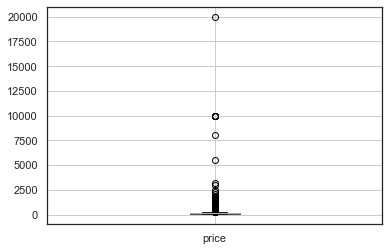

In [82]:
mean = df_filtered['price'].mean()
std_dev = df_filtered['price'].std()
boxplot = df_filtered.boxplot(column=['price'])

df_filtered = df_filtered[(df_filtered['price'] >= mean - 3 * std_dev) & (df_filtered['price'] <= mean + 3 * std_dev)]


In [20]:
df_filtered

,id,price,room_type,longitude,latitude,neighbourhood
1,25659,96.0,Entire home/apt,-9.127060,38.712410,Santa Maria Maior
2,29396,78.0,Entire home/apt,-9.129870,38.711560,Santa Maria Maior
3,29720,1032.0,Entire home/apt,-9.159790,38.711080,Estrela
4,29915,100.0,Entire home/apt,-9.152640,38.745710,Avenidas Novas
6,42519,90.0,Entire home/apt,-9.149000,38.710620,Misericrdia
...,...,...,...,...,...,...
24057,1235480337052471421,100.0,Entire home/apt,-9.134353,38.709984,Santa Maria Maior
24068,1236225183891064497,67.0,Private room,-9.147351,38.711798,Misericrdia
24074,1236697948245027193,120.0,Entire home/apt,-9.172818,38.704831,Estrela
24128,1239999103133917791,32.0,Private room,-9.153980,38.791235,Santa Clara


In [62]:
df_filtered.describe()

,id,price,longitude,latitude
count,1.127200e+04,11272.000000,11272.000000,11272.000000
mean,3.845417e+17,147.696061,-9.144522,38.720401
std,4.733790e+17,316.509270,0.018990,0.015232
min,2.565900e+04,11.000000,-9.226800,38.690098
25%,2.248763e+07,80.000000,-9.150801,38.710720
50%,4.533077e+07,115.000000,-9.142935,38.714919
75%,8.825789e+17,167.000000,-9.134067,38.726950
max,1.242064e+18,20000.000000,-9.091509,38.792250


In [68]:
a=round(df_filtered.describe(),2)
print(a.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &            id &     price &  longitude &  latitude \\
\midrule
count &  1.124800e+04 &  11248.00 &   11248.00 &  11248.00 \\
mean  &  3.842476e+17 &    138.05 &      -9.14 &     38.72 \\
std   &  4.732546e+17 &     98.56 &       0.02 &      0.02 \\
min   &  2.565900e+04 &     11.00 &      -9.23 &     38.69 \\
25\%   &  2.248976e+07 &     80.00 &      -9.15 &     38.71 \\
50\%   &  4.532156e+07 &    114.00 &      -9.14 &     38.71 \\
75\%   &  8.824686e+17 &    166.00 &      -9.13 &     38.73 \\
max   &  1.242064e+18 &   1092.00 &      -9.09 &     38.79 \\
\bottomrule
\end{tabular}



In [64]:
b= (
     df_filtered.melt(id_vars = "room_type", value_vars = "price").groupby(["room_type", "variable"]).agg(["mean", "std", "min", "max", "count"]).round(2)
)

In [65]:
print(b.to_latex())

\begin{tabular}{llrrrrr}
\toprule
            &       & \multicolumn{5}{l}{value} \\
            &       &    mean &     std &   min &      max & count \\
room\_type & variable &         &         &       &          &       \\
\midrule
Entire home/apt & price &  169.40 &  353.27 &  18.0 &  20000.0 &  8854 \\
Hotel room & price &  148.29 &  100.59 &  55.0 &    625.0 &    70 \\
Private room & price &   66.97 &   39.42 &  13.0 &    500.0 &  2264 \\
Shared room & price &   35.27 &   19.47 &  11.0 &    100.0 &    84 \\
\bottomrule
\end{tabular}



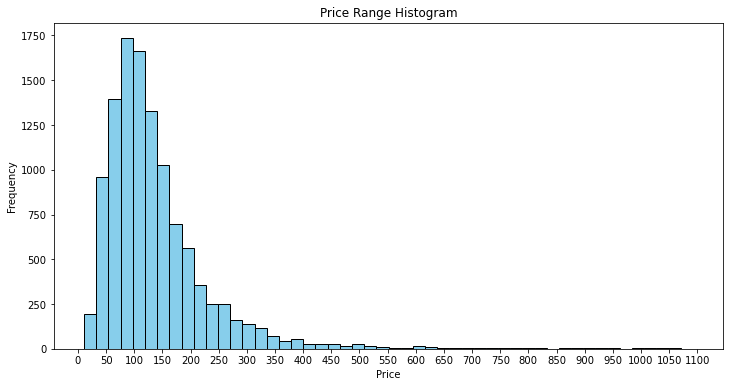

In [23]:
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['price'], bins=50, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Range Histogram')


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
 
# Display the plot
plt.show()

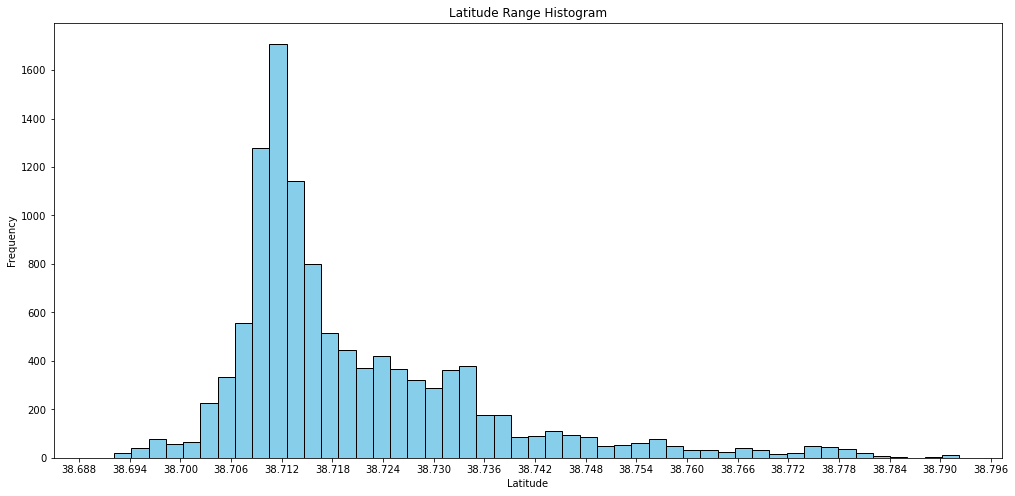

In [24]:
plt.figure(figsize=(17, 8))
plt.hist(df_filtered['latitude'], bins=50, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Latitude Range Histogram')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.006))
 
# Display the plot
plt.show()

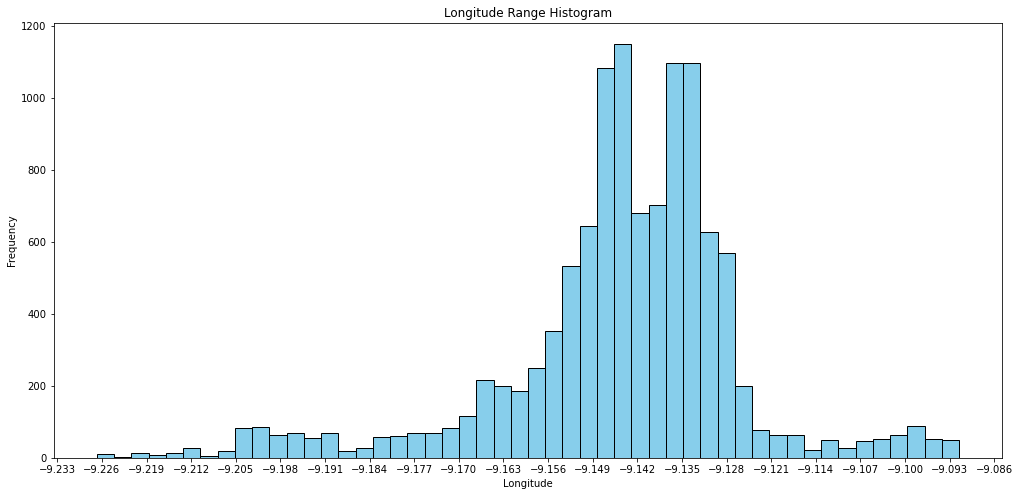

In [25]:
plt.figure(figsize=(17, 8))
plt.hist(df_filtered['longitude'], bins=50, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude Range Histogram')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.007))
 
# Display the plot
plt.show()

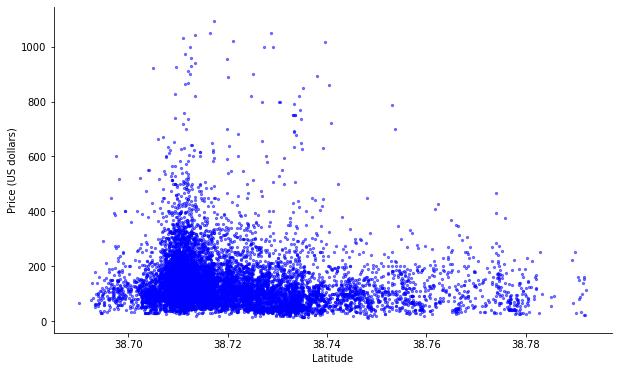

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Scatter plot for latitude vs price with adjustments for point size, color, and transparency
plt.scatter(df_filtered['latitude'], df_filtered['price'], color="blue", s=5, alpha=0.5)


# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Price (US dollars)")

# Remove the top and right spines for a similar look to theme_bw() in ggplot
sns.despine()

# Display the plot
plt.show()


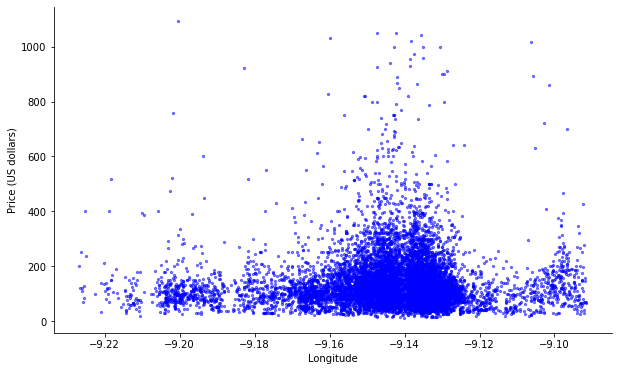

In [27]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Scatter plot for latitude vs price with adjustments for point size, color, and transparency
plt.scatter(df_filtered['longitude'], df_filtered['price'], color="blue", s=5, alpha=0.5)


# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Price (US dollars)")

# Remove the top and right spines for a similar look to theme_bw() in ggplot
sns.despine()

# Display the plot
plt.show()

## Analysis of the data

In [73]:
df_filtered['price_log'] = np.log(df_filtered['price'])
df_filtered['price'] = np.log(df_filtered['price'])


In [74]:
df_filtered

,id,price,room_type,longitude,latitude,neighbourhood,price_log
1,25659,4.564348,Entire home/apt,-9.127060,38.712410,Santa Maria Maior,4.564348
2,29396,4.356709,Entire home/apt,-9.129870,38.711560,Santa Maria Maior,4.356709
3,29720,6.939254,Entire home/apt,-9.159790,38.711080,Estrela,6.939254
4,29915,4.605170,Entire home/apt,-9.152640,38.745710,Avenidas Novas,4.605170
6,42519,4.499810,Entire home/apt,-9.149000,38.710620,Misericrdia,4.499810
...,...,...,...,...,...,...,...
24057,1235480337052471421,4.605170,Entire home/apt,-9.134353,38.709984,Santa Maria Maior,4.605170
24068,1236225183891064497,4.204693,Private room,-9.147351,38.711798,Misericrdia,4.204693
24074,1236697948245027193,4.787492,Entire home/apt,-9.172818,38.704831,Estrela,4.787492
24128,1239999103133917791,3.465736,Private room,-9.153980,38.791235,Santa Clara,3.465736


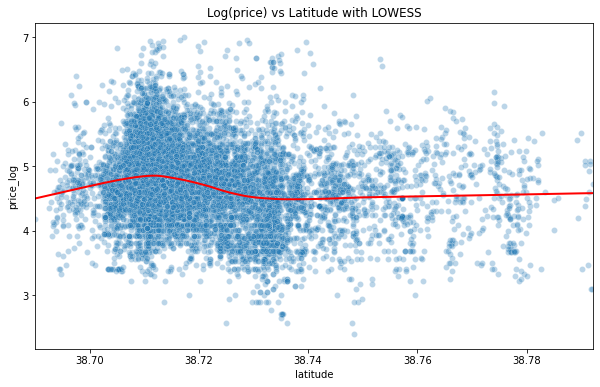

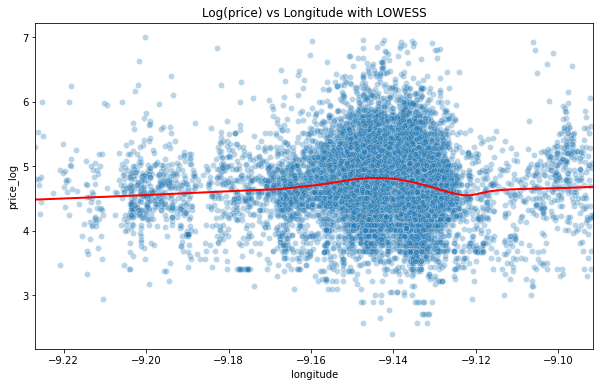

In [30]:
def plot_with_lowess(x, y, data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data, alpha=0.3)
    sns.regplot(x=x, y=y, data=data, scatter=False, lowess=True, color='red', line_kws={'linewidth': 2})
    plt.title(title)
    plt.show()

plot_with_lowess(x='latitude', y='price_log', data=df_filtered, title='Log(price) vs Latitude with LOWESS')

# price vs longitude
plot_with_lowess(x='longitude', y='price_log', data=df_filtered, title='Log(price) vs Longitude with LOWESS')




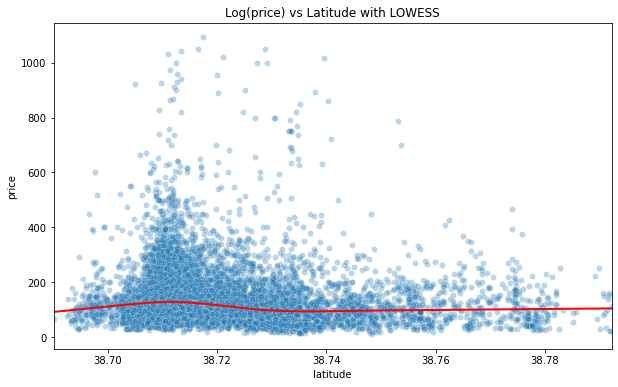

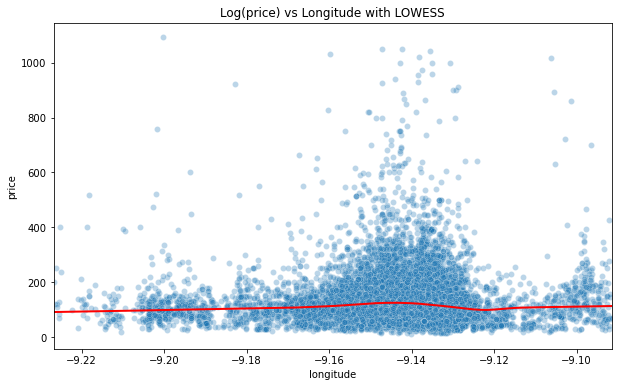

In [71]:
plot_with_lowess(x='latitude', y='price', data=df_filtered, title='Log(price) vs Latitude with LOWESS')

# price vs longitude
plot_with_lowess(x='longitude', y='price', data=df_filtered, title='Log(price) vs Longitude with LOWESS')

## Model 1: Simple Linear Regression with Continuous Variables Only

In [ ]:
#X_simple = df_filtered[['longitude']]
#X_simple = sm.add_constant(X_simple)  # Adding intercept
#y = df_filtered['price']  # log-transformed price

# Fit model with robust standard errors
#model_simple = sm.OLS(y, X_simple).fit(cov_type='HC3')
#print("Simple Linear Regression Model:\n", model_simple.summary())

In [73]:
df_filtered['longitude_sq'] = df_filtered['longitude'] ** 2

formula = 'price ~  longitude '
formula2 = 'price ~  longitude + longitude_sq'

model_nonlin = smf.ols(formula, data=df_filtered).fit(cov_type='HC3')
print("\nNonlinear Model with Transformations:\n", model_nonlin.summary())


Nonlinear Model with Transformations:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.806
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00301
Time:                        15:27:42   Log-Likelihood:                -10160.
No. Observations:               11248   AIC:                         2.032e+04
Df Residuals:                   11246   BIC:                         2.034e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [74]:
model_nonlin2 = smf.ols(formula2, data=df_filtered).fit(cov_type='HC3')
print("\nNonlinear Model with Transformations:\n", model_nonlin2.summary())


Nonlinear Model with Transformations:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.43
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.58e-16
Time:                        15:27:52   Log-Likelihood:                -10130.
No. Observations:               11248   AIC:                         2.027e+04
Df Residuals:                   11245   BIC:                         2.029e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

# Resuls of the regression

In [31]:
import statsmodels.formula.api as smf

In [32]:
reg = smf.ols(formula = "price ~ longitude", data = df_filtered).fit(cov_type="HC1")
reg.summary()

with open("regression_summary.tex", "w") as f:
    f.write(reg.summary().as_latex())

In [96]:
# to simplify regression results interpretation let's modify longtitude values by multiplication (*100) to get a change 
# of 1 step instead of 0.01 steps

df_filtered["longitude"] = df_filtered["longitude"] * 100
df_filtered["squared_longitude"] = df_filtered["longitude"] ** 2

In [76]:
reg2 = smf.ols(formula = "price ~ longitude + squared_longitude", data = df_filtered).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.58
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.94e-16
Time:                        21:45:51   Log-Likelihood:                -10130.
No. Observations:               11248   AIC:                         2.027e+04
Df Residuals:                   11245   BIC:                         2.029e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5221.0609    687.729     -7.592      0.000   -6568.985   -3873.137
longitude           -11.4266      1.502     -7.606      0.000     -14.371      -8.482
squared_longitude    -0.0062      0.001     -7.613      0.000      -0.008      -0.005
==============================================================================
Omnibus:                       86.241   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.325
Skew:                           0.095   Prob(JB):                     7.44e-27
Kurtosis:                       3.470   Cond. No.                     9.94e+10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.94e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
reg2 = smf.ols(formula="price ~ longitude", data=df_filtered).fit(cov_type="HC1")

# Create LaTeX table using stargazer
stargazer_result = Stargazer([reg2])

# Display the LaTeX code for the regression results
stargazer_result
print(stargazer_result.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: price}} \
\cr \cline{2-2}
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 Intercept & 1860.557$^{***}$ \\
& (417.538) \\
 longitude & 1.884$^{***}$ \\
& (0.457) \\
\hline \\[-1.8ex]
 Observations & 11248 \\
 $R^2$ & 0.001 \\
 Adjusted $R^2$ & 0.001 \\
 Residual Std. Error & 98.500 (df=11246) \\
 F Statistic & 17.025$^{***}$ (df=1; 11246) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


In [80]:
p_value = reg2.pvalues['longitude']
beta_coeff = reg2.params['longitude']

# Define significance level
alpha = 0.05

# Print results
print(f"β coefficient for'longitude': {beta_coeff:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print(f"Reject the null hypothesis (H0: β = 0). Evidence suggests β ≠ 0 at α = {alpha}.")
else:
    print(f"Fail to reject the null hypothesis. No evidence that β ≠ 0 at α = {alpha}.")

β coefficient for'longitude': -11.4266
p-value: 0.0000
Reject the null hypothesis (H0: β = 0). Evidence suggests β ≠ 0 at α = 0.05.


In [35]:
z = reg2.get_prediction().conf_int()
res = reg2.get_prediction().summary_frame()
df_filtered["lnwpred_longq"] = res["mean"]
df_filtered["lnwpred_longqCIUP"] = [x[0] for x in z]
df_filtered["lnwpred_longqCILO"] = [x[1] for x in z]

In [36]:
results_data = pd.DataFrame({
    'fitted_values': reg2.fittedvalues,  
    'residuals': reg2.resid 
})

In [37]:
df_filtered = df_filtered.join(results_data[['fitted_values', 'residuals']])

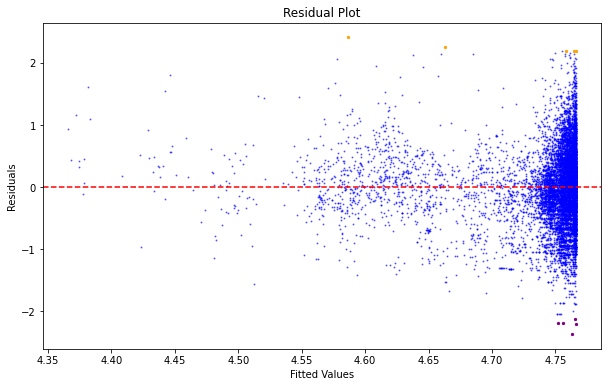

In [38]:
plt.figure(figsize=(10, 6))

residuals = reg2.resid
largest_positive_errors = df_filtered.nlargest(5, 'residuals')
largest_negative_errors = df_filtered.nsmallest(5, 'residuals')

plt.scatter(reg2.fittedvalues, reg2.resid, alpha=0.5, s = 1, color='blue')
plt.scatter(
    largest_positive_errors['fitted_values'], largest_positive_errors['residuals'], 
    color='orange', s=5, label='Largest Positive Errors'
)
plt.scatter(
    largest_negative_errors['fitted_values'], largest_negative_errors['residuals'], 
    color='purple', s=5, label='Largest Negative Errors'
)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig('residual_plot.jpg')
plt.show()

In [39]:
largest_positive_errors

,id,price,room_type,longitude,latitude,neighbourhood,price_log,squared_longitude,lnwpred_longq,lnwpred_longqCIUP,lnwpred_longqCILO,fitted_values,residuals
15510,797060887587695357,6.995766,Entire home/apt,-920.036268,38.717353,Ajuda,6.995766,846466.735269,4.586621,4.545466,4.627776,4.586621,2.409145
21011,1112115803119292059,6.925595,Entire home/apt,-910.620057,38.739532,Marvila,6.925595,829228.887492,4.663092,4.623283,4.702900,4.663092,2.262503
8327,32257143,6.956545,Entire home/apt,-914.227000,38.728810,Arroios,6.956545,835811.007529,4.764681,4.752503,4.776859,4.764681,2.191864
20974,1109404023140472231,6.956545,Entire home/apt,-914.727000,38.716530,Santo Antnio,6.956545,836725.484529,4.765937,4.753181,4.778693,4.765937,2.190609
11067,45794379,6.947937,Entire home/apt,-913.555000,38.713410,Santa Maria Maior,6.947937,834582.738025,4.758074,4.745523,4.770624,4.758074,2.189864


In [40]:
largest_negative_errors

,id,price,room_type,longitude,latitude,neighbourhood,price_log,squared_longitude,lnwpred_longq,lnwpred_longqCIUP,lnwpred_longqCILO,fitted_values,residuals
8099,31826097,2.397895,Shared room,-914.027000,38.748320,Alvalade,2.397895,835445.356729,4.763304,4.751194,4.775415,4.763304,-2.365409
10691,43839300,2.564949,Private room,-914.739000,38.748010,Alvalade,2.564949,836747.438121,4.765929,4.753154,4.778703,4.765929,-2.200979
11799,50099746,2.564949,Shared room,-913.424301,38.724888,Arroios,2.564949,834343.953927,4.756133,4.743277,4.768989,4.756133,-2.191184
18632,966124871224218792,2.564949,Shared room,-913.193100,38.736110,Arroios,2.564949,833921.637888,4.752178,4.738559,4.765797,4.752178,-2.187229
19556,1026728376509786842,2.639057,Shared room,-914.336000,38.735050,Arroios,2.639057,836010.320896,4.765221,4.752960,4.777482,4.765221,-2.126164


In [41]:
plotdata = df_filtered.filter(["longitude", "lnwpred_longq", "lnwpred_longqCIUP", "lnwpred_longqCILO"]).melt(
    id_vars=["longitude"]
)
plotdata

,longitude,variable,value
0,-912.706000,lnwpred_longq,4.741660
1,-912.987000,lnwpred_longq,4.748089
2,-915.979000,lnwpred_longq,4.755381
3,-915.264000,lnwpred_longq,4.763808
4,-914.900000,lnwpred_longq,4.765644
...,...,...,...
33739,-913.435330,lnwpred_longqCILO,4.769132
33740,-914.735090,lnwpred_longqCILO,4.778700
33741,-917.281820,lnwpred_longqCILO,4.742316
33742,-915.398049,lnwpred_longqCILO,4.776682


In [56]:
plotdata.to_csv('plottt.csv')

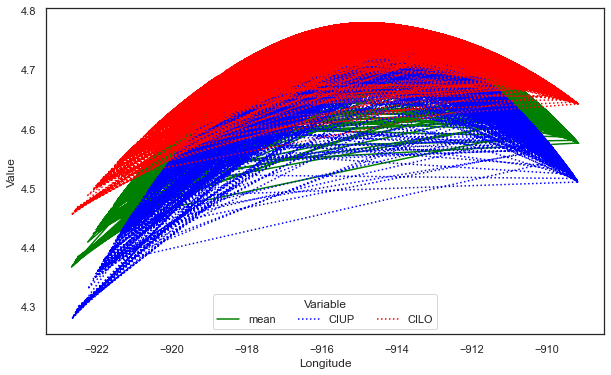

In [55]:
plt.figure(figsize=(10, 6))

# Map colors and linestyles for each variable
color_map = {"lnwpred_longq": "green", "lnwpred_longqCIUP": "blue", "lnwpred_longqCILO": "red"}
linestyle_map = {"lnwpred_longq": "-", "lnwpred_longqCIUP": ":", "lnwpred_longqCILO": ":"}

# Loop through each unique variable to plot lines with specific colors and line types
for variable in plotdata['variable'].unique():
    subset = plotdata[plotdata['variable'] == variable]
    
    plt.plot(
        subset['longitude'], 
        subset['value'], 
        label=variable, 
        color=color_map.get(variable, 'black'),  # default to black if variable not in map
        linestyle=linestyle_map.get(variable, '-'),  # default to solid line if not in map
        linewidth=1.5
    )

# Add axis labels
plt.xlabel("Longitude")
plt.ylabel("Value")

# Set the limits for x and y axes if necessary (adjust as per your data's range)
# Example: plt.xlim(min(plotdata['longitude']), max(plotdata['longitude']))
# plt.ylim(min(plotdata['value']), max(plotdata['value']))

# Customize the legend
plt.legend(
    loc='lower center', 
    bbox_to_anchor=(0.5, 0), 
    ncol=3, 
    title="Variable",
    labels=["mean", "CIUP", "CILO"]
)

# Display the plot
plt.show()

In [43]:
room_types=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [44]:
models = []
for room_type in room_types:
    models.append(
        smf.ols(
            "price ~ longitude + squared_longitude", data=df_filtered.loc[lambda x: x["room_type"] == room_type]
        ).fit(cov_type="HC1")
    )

In [45]:
models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     79.58
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           5.57e-35
Time:                        17:46:26   Log-Likelihood:                -6159.7
No. Observations:                8830   AIC:                         1.233e+04
Df Residuals:                    8827   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6259.1820    658.923     -9.499      0.000   -7550.647   -4967.716
longitude           -13.7089      1.440     -9.522      0.000     -16.531     -10.887
squared_longitude    -0.0075      0.001     -9.538      0.000      -0.009      -0.006
==============================================================================
Omnibus:                      694.002   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              970.057
Skew:                           0.657   Prob(JB):                    2.26e-211
Kurtosis:                       3.955   Cond. No.                     9.55e+10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.55e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
stargazer = Stargazer(models)
stargazer.custom_columns(room_types, [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())
latex_output = stargazer.render_latex()
with open("stargazert.tex", "w") as file:
    file.write(latex_output)

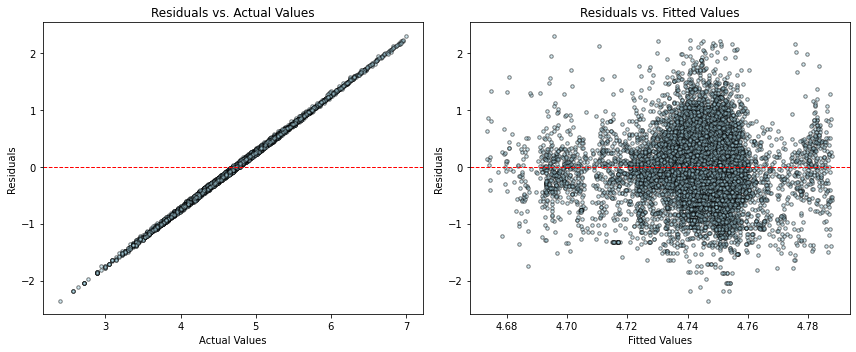

In [94]:
# Получаем предсказанные значения и остатки
fitted_values = model_nonlin.fittedvalues  # Предсказанные значения модели
residuals = model_nonlin.resid             # Остатки модели
actual_values = df_filtered['price']       # Фактические значения цены

# График 1: Residuals vs. Actual Values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(actual_values, residuals,color='lightblue', edgecolor='k', alpha=0.5, s=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')

# График 2: Residuals vs. Fitted Values
plt.subplot(1, 2, 2)
plt.scatter(fitted_values, residuals, color='lightblue', edgecolor='k', alpha=0.5, s=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

plt.tight_layout()
plt.show()